In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [37]:
games = pd.read_csv('Clean/games_clean.csv')
players = pd.read_csv('Clean/players_clean.csv')
teams = pd.read_csv('Clean/teams_clean.csv')
ranking = pd.read_csv('Clean/ranking_clean.csv')
games_details = pd.read_csv('Clean/games_details_clean.csv')

In [38]:
ranking = ranking[ranking.Games == 82]

In [39]:
games_details.head()

,Unnamed: 0,Team ID,Team Abbr,City,Player ID,Position,Minutes,Field Goals Made,Field Goals Attempted,Field Goals %,3 Pt Field Goals Made,3 Pt Field Goals Attempted,3 Pt Field Goals %,Free Throws Made,Free Throws Attempted,Free Throws %,Rebounds,Assists,Personal Fouls,Points
0,0,1610612764,WAS,Washington,203078,F,34:36:00,14.0,28.0,0.500,1.0,6.0,0.167,4.0,6.0,0.667,4.0,3.0,0.0,33.0
1,1,1610612764,WAS,Washington,1629060,F,25:50:00,4.0,6.0,0.667,1.0,1.0,1.000,2.0,3.0,0.667,7.0,1.0,4.0,11.0
2,2,1610612764,WAS,Washington,203458,C,12:11,3.0,5.0,0.600,0.0,0.0,0.000,0.0,0.0,0.000,5.0,0.0,2.0,6.0
3,3,1610612764,WAS,Washington,203526,G,19:19,2.0,5.0,0.400,0.0,2.0,0.000,0.0,0.0,0.000,3.0,1.0,2.0,4.0
4,4,1610612764,WAS,Washington,201566,G,29:07:00,2.0,10.0,0.200,0.0,3.0,0.000,6.0,10.0,0.600,6.0,11.0,0.0,10.0


In [40]:
ranking.columns

Index(['Unnamed: 0', 'Team ID', 'Conference', 'Team', 'Games', 'Wins',
       'Losses', 'Wins %', 'Record Home', 'Record Away'],
      dtype='object')

In [41]:
df = ranking[['Team','Wins','Losses']]

In [42]:
df1 = df.drop_duplicates()

In [43]:
df1

,Team,Wins,Losses
16259,San Antonio,62,20
16260,Oklahoma City,59,23
16261,L.A. Clippers,57,25
16262,Houston,54,28
16263,Portland,54,28
...,...,...,...
187159,Brooklyn,38,44
187160,Indiana,38,44
187161,Miami,37,45
187163,Detroit,32,50


In [44]:
import time

In [45]:
time.ctime(165267)

'Fri Jan  2 16:54:27 1970'

In [46]:
df1[df1.index == 165267]

,Team,Wins,Losses
165267,Milwaukee,60,22


In [47]:
games_details.columns

Index(['Unnamed: 0', 'Team ID', 'Team Abbr', 'City', 'Player ID', 'Position',
       'Minutes', 'Field Goals Made', 'Field Goals Attempted', 'Field Goals %',
       '3 Pt Field Goals Made', '3 Pt Field Goals Attempted',
       '3 Pt Field Goals %', 'Free Throws Made', 'Free Throws Attempted',
       'Free Throws %', 'Rebounds', 'Assists', 'Personal Fouls', 'Points'],
      dtype='object')

In [48]:
grp = games_details.groupby('Team Abbr')
grp2 = ranking.groupby('Team ID').Wins.sum().reset_index()

merged = pd.DataFrame()
merged['Team ID'] = grp.max()['Team ID']
merged['Personal_Fouls'] = grp['Personal Fouls'].sum()
merged['Free Throws Attempted'] = grp['Free Throws Attempted'].sum()
merged.reset_index(inplace=True)

merged = merged.merge(grp2, on='Team ID').set_index('Team Abbr')
merged.head()

<ipython-input-48-94f21cb7de73>:5: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  merged['Team ID'] = grp.max()['Team ID']


,Team ID,Personal_Fouls,Free Throws Attempted,Wins
Team Abbr,,,,
ATL,1610612737,34033.0,38537.0,100206
BKN,1610612751,16240.0,18999.0,92247
NJN,1610612751,18183.0,20439.0,92247
BOS,1610612738,38265.0,41061.0,114642
CHA,1610612766,29739.0,36543.0,84393


<AxesSubplot:xlabel='Team Abbr'>

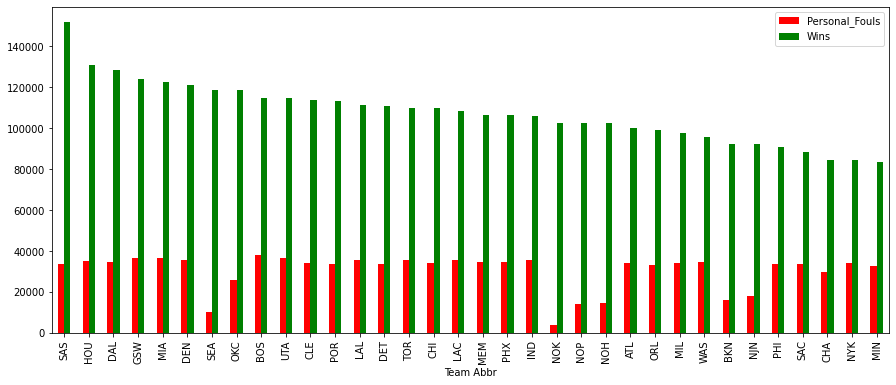

In [81]:
merged.drop(columns=['Team ID','Free Throws Attempted']).sort_values('Wins',ascending=False).plot.bar(figsize=(15,6),color=['Red','Green'])

In [ ]:
pd.DataFrame().plot.line()

In [65]:
df.index

Index(['SAS', 'HOU', 'DAL', 'GSW', 'MIA', 'DEN', 'SEA', 'OKC', 'BOS', 'UTA',
       'CLE', 'POR', 'LAL', 'DET', 'TOR', 'CHI', 'LAC', 'MEM', 'PHX', 'IND',
       'NOK', 'NOP', 'NOH', 'ATL', 'ORL', 'MIL', 'WAS', 'BKN', 'NJN', 'PHI',
       'SAC', 'CHA', 'NYK', 'MIN'],
      dtype='object', name='Team Abbr')

In [ ]:
df = merged.drop(columns=['Team ID','Personal_Fouls']).sort_values('Wins',ascending=False)

In [69]:
df

,Free Throws Attempted,Wins
Team Abbr,,
SAS,39492.0,151806
HOU,41779.0,131177
DAL,39122.0,128572
GSW,38927.0,124047
MIA,42440.0,122734
DEN,43846.0,121401
SEA,10845.0,118714
OKC,31115.0,118714
BOS,41061.0,114642


<AxesSubplot:xlabel='Team Abbr'>

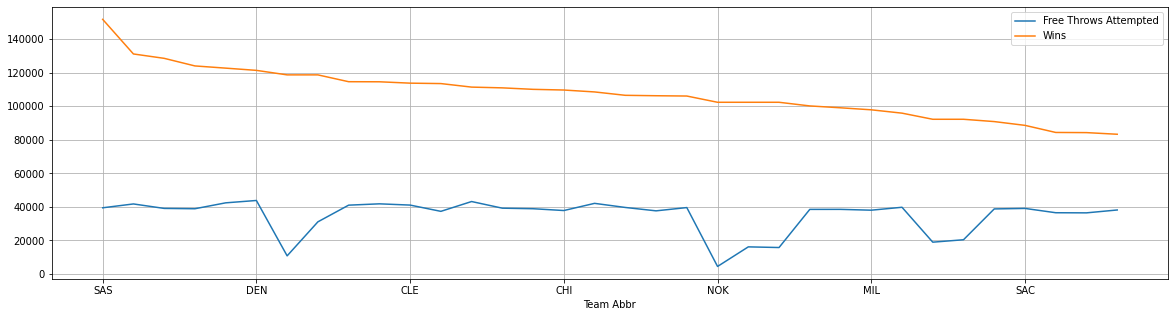

In [71]:
df.plot.line(figsize=(15,6),grid=True,use_index=True)

In [72]:
df.head()

,Free Throws Attempted,Wins
Team Abbr,,
SAS,39492.0,151806
HOU,41779.0,131177
DAL,39122.0,128572
GSW,38927.0,124047
MIA,42440.0,122734


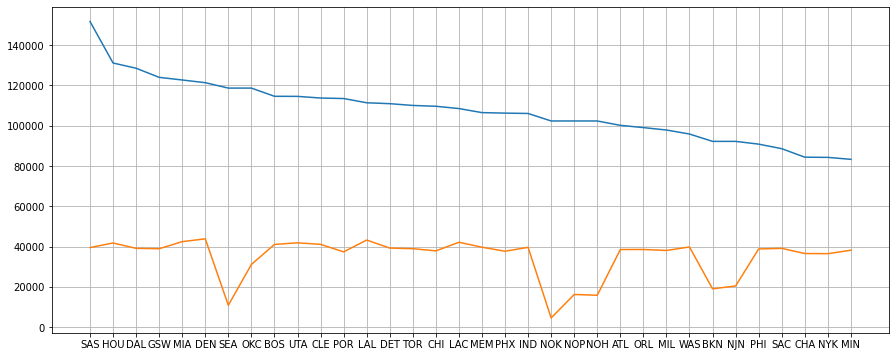

In [78]:
plt.figure(figsize=[15,6])
plt.grid()
plt.plot(df.index, df.Wins)
plt.plot(df.index, df['Free Throws Attempted'])